In [1]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch

In [2]:
def get_bert_embedding(word, model, tokenizer):
    """Get BERT embedding for a single word."""
    # Add special tokens and convert to tensor
    marked_text = word
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    tokens_tensor = torch.tensor([indexed_tokens])

    # Get BERT embeddings
    with torch.no_grad():  # Disable gradient computation
        embeddings = model.embeddings(tokens_tensor)

    embedding_value = float(torch.mean(embeddings))
    return embedding_value

In [3]:
def visualize_word_embeddings(words):
    """Create visualization of word embeddings."""
    # Load BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Get embeddings for each word
    embedding_values = []
    for word in words:
        val = get_bert_embedding(word, model, tokenizer)
        embedding_values.append(val)

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot each word
    for word, val in zip(words, embedding_values):
        plt.axvline(x=val, color='orange', alpha=0.3, linewidth=1)
        plt.text(val, np.random.uniform(0.1, 0.9), word,
                horizontalalignment='left', verticalalignment='center')

    # Customize the plot
    plt.title('Words and Their Embeddings')
    plt.xlabel('Average embedding value')
    plt.yticks([])  # Hide y-axis ticks
    plt.grid(False)

    return plt

In [6]:
# Words to plot
words = ['risk', 'strength', 'strong', 'gain',
         'collapse', 'decline', 'plunged', 'bull', 'dividend',
         'inflation', 'hedge', 'risky', 'recession', 'volatile', 'bankrupt', 'resilient']

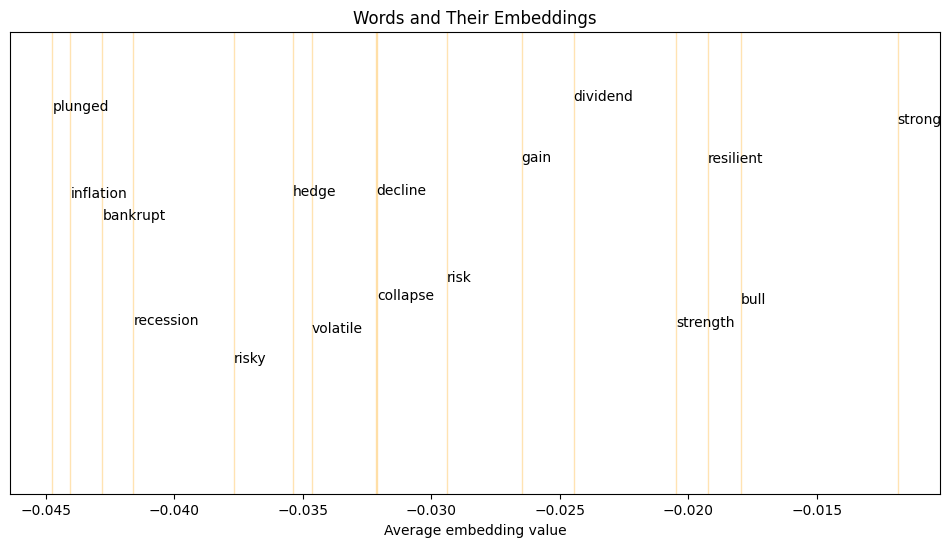

In [7]:
# Visualization
plt = visualize_word_embeddings(words)
plt.show()